# K - Nearest Neighbors Algorithm

## References (Medium Blog)




https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6#:~:text=KNN%20is%20a%20classification%20algorithm,and%20it%20has%20few%20parameters.

## Dependencies

In [1]:
# for data handling
import pandas as pd
import numpy as np

# for data visualizing
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# for data preprocessing
from sklearn.preprocessing import StandardScaler

# for spliting data into train and test sets
from sklearn.model_selection import train_test_split

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Dataset

https://raw.githubusercontent.com/kbrook10/bootcamp_python_for_data_science_and_machine_learning/master/support_files/Machine%20Learning%20Sections/K-Nearest-Neighbors/Classified%20Data

In [2]:
!wget https://raw.githubusercontent.com/kbrook10/bootcamp_python_for_data_science_and_machine_learning/master/support_files/Machine%20Learning%20Sections/K-Nearest-Neighbors/Classified%20Data

--2023-03-21 16:34:13--  https://raw.githubusercontent.com/kbrook10/bootcamp_python_for_data_science_and_machine_learning/master/support_files/Machine%20Learning%20Sections/K-Nearest-Neighbors/Classified%20Data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194323 (190K) [text/plain]
Saving to: ‘Classified Data’

Classified Data     100%[===================>] 189.77K  --.-KB/s    in 0.03s   

2023-03-21 16:34:14 (6.73 MB/s) - ‘Classified Data’ saved [194323/194323]



In [3]:
!ls

'Classified Data'   sample_data


In [4]:
!head 'Classified Data'

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.9139173265804122,1.162072707738686,0.5679458536608835,0.7554638959888053,0.7808615715474211,0.3526077229335367,0.7596969140337959,0.6437975644205896,0.8794220913503251,1.2314094373345865,1
1,0.6356319040582334,1.0037216291809468,0.5353423517706737,0.8256448459795241,0.9241089292160148,0.6484502366838869,0.6753343122306434,1.0135459920525625,0.621552215350488,1.4927016046356893,0
2,0.7213598079583814,1.2014926236186863,0.921989733476548,0.8555949834078469,1.5266293883585085,0.720780887111782,1.626350711360958,1.1544831470276795,0.9578770228983207,1.2855967931952772,0
3,1.2342044015229892,1.3867262910227907,0.6530463056350606,0.8256244452701601,1.142503540047211,0.8751279212294097,1.4097080602602086,1.3800025459668137,1.5226920462447513,1.1530930248076359,1
4,1.2794908243775642,0.9497495573001323,0.6272800413029391,0.6689760819458959,1.2325373035658138,0.703727439100354,1.1155955027340818,0.6466906982053768,1.4638117509917998,1.41

In [5]:
df = pd.read_csv('Classified Data', index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Preprocessing

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [12]:
# creating a dataframe out of the normalized data
data = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [13]:
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train and Test Splits

In [ ]:
X = data
Y = df['TARGET CLASS']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model = knn.fit(x_train, y_train)

In [ ]:
knn_model

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(x_test)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
knn_model.score(x_test, y_test)

0.9233333333333333

## Evaluate

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [ ]:
mat = confusion_matrix(y_test, pred)
print(mat)

[[151   8]
 [ 15 126]]


In [ ]:
print('TP - True Positive {}'.format(mat[0,0]))
print('FP - False Positive {}'.format(mat[0,1]))
print('FN - False Negative {}'.format(mat[1,0]))
print('TN - True Negative {}'.format(mat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([mat[0,0],mat[1,1]]),np.sum(mat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([mat[0,1],mat[1,0]]),np.sum(mat))))

TP - True Positive 151
FP - False Positive 8
FN - False Negative 15
TN - True Negative 126
Accuracy Rate: 0.9233333333333333
Misclassification Rate: 0.07666666666666666


In [ ]:
print(accuracy_score(pred, y_test))

0.9233333333333333


## Hyper parameter(k)

Changing alternative K-values for better predictions

In [ ]:
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  error_rate.append(np.mean(y_pred != y_test))

In [ ]:
for i in range(len(error_rate)):
  print(i+1, error_rate[i])

1 0.07666666666666666
2 0.09
3 0.05
4 0.07
5 0.056666666666666664
6 0.05
7 0.06666666666666667
8 0.06
9 0.05
10 0.056666666666666664
11 0.05333333333333334
12 0.04666666666666667
13 0.05
14 0.056666666666666664
15 0.056666666666666664
16 0.05
17 0.05
18 0.04666666666666667
19 0.05
20 0.05333333333333334
21 0.05
22 0.05
23 0.06333333333333334
24 0.056666666666666664
25 0.056666666666666664
26 0.05
27 0.05
28 0.04666666666666667
29 0.06
30 0.05
31 0.056666666666666664
32 0.04666666666666667
33 0.05333333333333334
34 0.043333333333333335
35 0.04666666666666667
36 0.043333333333333335
37 0.04666666666666667
38 0.043333333333333335
39 0.05


Text(0, 0.5, 'Error rate')

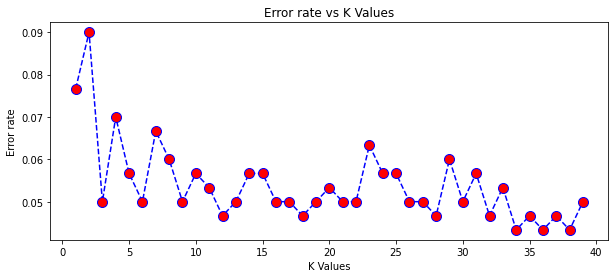

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title("Error rate vs K Values")
plt.xlabel('K Values')
plt.ylabel('Error rate')

## Improving Accuracy

In [ ]:
# Consider k for which the error rate is minimum
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       159
           1       0.95      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
knn.score(x_test, y_test)

0.95

In [ ]:
print(accuracy_score(y_test, pred))

0.95


In [ ]:
mat = confusion_matrix(y_test, pred)
print(mat)

[[152   7]
 [  8 133]]


In [ ]:
print('TP - True Positive {}'.format(mat[0,0]))
print('FP - False Positive {}'.format(mat[0,1]))
print('FN - False Negative {}'.format(mat[1,0]))
print('TN - True Negative {}'.format(mat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([mat[0,0],mat[1,1]]),np.sum(mat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([mat[0,1],mat[1,0]]),np.sum(mat))))

TP - True Positive 152
FP - False Positive 7
FN - False Negative 8
TN - True Negative 133
Accuracy Rate: 0.95
Misclassification Rate: 0.05
